In [14]:
# import libraries
import pandas as pd
import numpy as np
import random

SyntaxError: invalid syntax (1906331038.py, line 2)

Exercise 3:

In [2]:
class Tree:
    def __init__(self):
        self.value = None
        self.left = None
        self.right = None

    def add(self, item):
        if self.value is None:
            self.value = item
            return 
        
        elif item < self.value:
            if self.left:
                self.left.add(item)
            else:
                self.left = Tree()
                self.left.add(item)
            return
        
        elif item > self.value:
            if self.right:
                self.right.add(item)
            else:
                self.right = Tree()
                self.right.add(item)
        return
    
    def __contains__(self, item):
        if self.value == item:
            return True
        elif self.left and item < self.value:
            return item in self.left
        elif self.right and item > self.value:
            return item in self.right
        else:
            return False

In [3]:
def printTree(tree, list=[]):
    if not tree: return []
    list.append(tree.value)
    if tree.left: printTree(tree.left, list)
    if tree.right: printTree(tree.right, list)
    return list

In [4]:
my_tree = Tree()
for item in [55, 62, 37, 49, 71, 14, 17]:
     my_tree.add(item)
print(printTree(my_tree, list=[]))

[55, 37, 14, 17, 49, 62, 71]


In [5]:
my_tree.__contains__(55)

True

In [6]:
my_tree.__contains__(42)

False

Using various sizes n of trees (populated with random data) and sufficiently many calls to in (each individual call should be very fast, so you may have to run many repeated tests), demonstrate that in is executing in O(log n) times; on a log-log plot, for sufficiently large n, the graph of time required for checking if a number is in the tree as a function of n should be almost horizontal. 

In [8]:
import random
import time
import math
import statistics
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

O(log n) times

In [9]:
test_time = []
n_sample = 1000
repeat = 100
for _ in range(n_sample):
    n = random.randint(0, 10000)
    my_tree = Tree()
    for _ in range(n):
        my_tree.add(random.random())
    start = time.time()
    for _ in range(repeat):
        my_tree.__contains__(random.random())
    end = time.time()
    test_time.append((end - start, n))


In [10]:
plt.scatter([x[1] for x in test_time], [x[0] for x in test_time], s=1)
plt.show()

NameError: name 'plt' is not defined

This speed is not free. Provide supporting evidence that the time to setup the tree is O(n log n) by timing it for various sized ns and showing that the runtime lies between a curve that is O(n) and one that is O(n**2)

O(n)

In [15]:
test_time_2 = []
n_sample = 100
repeat = 10
for _ in range(n_sample):
    n = random.randint(0, 10000)
    secquence = [random.random() for _ in range(n)]
    start = time.time()
    for _ in range(repeat):
        my_tree = Tree()
        for i in secquence:
            my_tree.add(i)
    end = time.time()
    test_time_2.append((end - start, n))

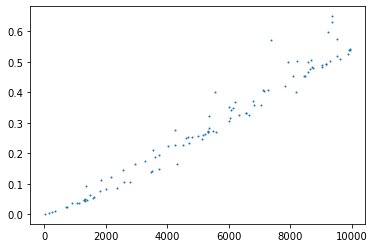

In [11]:
plt.scatter([x[1] for x in test_time_2], [x[0] for x in test_time_2], s=1)
plt.show()

O(n**2)

In [16]:
test_time_3 = []
n_sample = 100
repeat = 10
for _ in range(n_sample):
    n = random.randint(0, 200)
    secquence = [random.random() for _ in range(n)]
    secquence = sorted(secquence)
    start = time.time()
    for _ in range(repeat):
        my_tree = Tree()
        for i in secquence:
            my_tree.add(i)
    end = time.time()
    test_time_3.append((end - start, n))


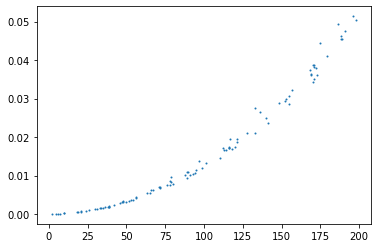

In [13]:
plt.scatter([x[1] for x in test_time_3], [x[0] for x in test_time_3], s=1)
plt.show()

n**2, and n

In [17]:
def time_function(n):
    timing = []
    n = [random.randint(1,n) for _ in range(n)]
    for attempt in [i for i in range(100)]:
        start = time.time
        my_tree = Tree()
        for item in n:
            my_tree.add(item)
        end = time.time()
        timing.append(end - start)
    return min(times)

In [22]:
n_size = [1,100,1000,10000] 
true_size = [time_function(n) for n in n_size]
size = true_size [0]
quadratic = [size*(n**2) for n in n_size] 
linear = [size*n for n in n_size]
plt.plot(n_size,true_size)
plt.plot(n_size,quadratic)
plt.plot(n_size,linear)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('time')
plt.xlabel('n_size')
plt.legend(['run time','n^2','n'],loc = 'upper left')
plt.show()

TypeError: unsupported operand type(s) for -: 'float' and 'builtin_function_or_method'

Exercise 2:

In [ ]:
#2
with open('/Users/polina/Desktop/words.txt') as f:
    for line in f:
        word = line.strip()
        # do something with the word here

In [ ]:
import bitarray
data = bitarray.bitarray(size)

In [ ]:
import mmh3

class BloomFilter(set):

    def __init__(self, size, hash_count):
        super(BloomFilter, self).__init__()
        self.bit_array = bitarray(size)
        self.bit_array.setall(0)
        self.size = size
        self.hash_count = hash_count

    def __len__(self):
        return self.size

    def __iter__(self):
        return iter(self.bit_array)

    def add(self, item):
        for ii in range(self.hash_count):
            index = mmh3.hash(item, ii) % self.size
            self.bit_array[index] = 1

        return self

    def __contains__(self, item):
        out = True
        for ii in range(self.hash_count):
            index = mmh3.hash(item, ii) % self.size
            if self.bit_array[index] == 0:
                out = False

        return out

Exercise 4:

In [ ]:
def alg1(data):
    data = list(data)
    changes = True
    while changes:
        changes = False
    for i in range(len(data) - 1):
          if data[i + 1] < data[i]:
            data[i], data[i + 1] = data[i + 1], data[i]
            changes = True
    return data

In [ ]:
def alg2(data):
    if len(data) <= 1:
        return data
    else:
        split = len(data) // 2
        left = iter(alg2(data[:split]))
        right = iter(alg2(data[split:]))
        result = []
    # note: this takes the top items off the left and right piles
        left_top = next(left)
        right_top = next(right)
        while True:
              if left_top < right_top:
                result.append(left_top)
                try:
                    left_top = next(left)
                except StopIteration:
          # nothing remains on the left; add the right + return
                  return result + [right_top] + list(right)
          else:
            result.append(right_top)
            try:
            right_top = next(right)
            except StopIteration:
          # nothing remains on the right; add the left + return
            return result + [left_top] + list(left)